calculamos los distintos features:

In [137]:
import numpy as np
import seaborn as sns
import scipy.io as sio
import pandas as pd

from math import ceil, log, log10
from random import randint
from scipy.stats import ranksums, bartlett, describe
from scipy.signal import welch
from scipy.fftpack import rfft
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression

plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
filenamesP = ['../tp2/dataset/P0'+str(i)+'.mat' for i in range(1,10)]+['../tp2/dataset/P10.mat']
filenamesS = ['../tp2/dataset/S0'+str(i)+'.mat' for i in range(1,10)]+['../tp2/dataset/S10.mat']
bandas = ['delta_mean', 'epsilon_mean', 'alfa_mean', 'beta_mean', 'gamma_mean',
          'delta_std',  'epsilon_std',  'alfa_std',  'beta_std',  'gamma_std']

In [3]:
def FrecuenciasPorTipo(archivos, grupo):
    freqPotXPersona = []
    for filename in archivos:
        array = sio.loadmat(filename)['data']
        ffs = []
        for i in range(256):
            muestras= array[:,i][0]
            ff= welch(muestras, fs=250, nperseg=201)
            ffs.append(ff[1])
        frecuencia = ff[0]
        arrayffs = np.array(ffs)
        freqPotXPersona.append((frecuencia,arrayffs.mean(axis=0)))
#     for index, freqPot in enumerate(freqPotXPersona):
#         plt.plot(freqPot[0],freqPot[1], label=grupo+str(index+1))
#     plt.legend(loc='best')
#     plt.xlim(0,50)
#     plt.show()
    
    return freqPotXPersona

def PromedioBandas(freqPotXPersona):
    proms = []
    stds = []
    for j in range(len(freqPotXPersona)):
        proms.append([])
        stds.append([])
        freqPot = freqPotXPersona[j]
        buckets = [[],[],[],[],[]]
        for i in range(len(freqPot[1])):
            if freqPot[0][i] < 4:
                buckets[0].append(freqPot[1][i])
            elif freqPot[0][i] < 8:
                buckets[1].append(freqPot[1][i])
            elif freqPot[0][i] < 13:
                buckets[2].append(freqPot[1][i])
            elif freqPot[0][i] < 30:
                buckets[3].append(freqPot[1][i])
            else:
                buckets[4].append(freqPot[1][i])
        
        for i in range(len(buckets)):
            buckets[i] = np.array(buckets[i])
            proms[j].append(buckets[i].mean())
            stds[j].append(buckets[i].std())

    return proms, stds
    

In [4]:
frecuenciasP = FrecuenciasPorTipo(filenamesP,'P') #FrecuenciasPorTipo plotea
frecuenciasS = FrecuenciasPorTipo(filenamesS, 'S')

bandasP_mean, bandasP_std = PromedioBandas(frecuenciasP)
bandasS_mean, bandasS_std= PromedioBandas(frecuenciasS)

for i in range(len(bandasP_mean)):
    bandasP_mean[i] += bandasP_std[i]
    bandasS_mean[i] += bandasS_std[i]

In [4]:
# tablaP = pd.DataFrame(bandasP_mean, columns=bandas, index=['P'+str(i) for i in range(1,11)])
# tablaS = pd.DataFrame(bandasS_mean, columns=bandas, index=['S'+str(i) for i in range(1,11)])
# tablaP['Tipo'] = 'P'
# tablaS['Tipo'] = 'S'

# bandas_no_normalizadas = pd.concat([tablaP, tablaS])
# bandas_no_normalizadas.to_pickle("poder_espectral_no_norm.df")
bandas_no_normalizadas = pd.read_pickle("poder_espectral_no_norm.df")
bandas_no_normalizadas

,delta_mean,epsilon_mean,alfa_mean,beta_mean,gamma_mean,delta_std,epsilon_std,alfa_std,beta_std,gamma_std,Tipo
P1,1.013976e-11,2.114767e-12,8.597311e-13,1.357580e-12,2.591455e-13,6.045476e-12,7.788568e-13,1.333585e-13,6.366335e-13,6.654151e-13,P
P2,2.776192e-11,2.215931e-12,9.486518e-13,1.045988e-12,6.248615e-14,1.511155e-11,1.298956e-12,4.012490e-13,7.667534e-13,1.537834e-13,P
P3,4.401700e-11,3.088734e-12,4.638416e-13,1.285836e-13,9.613761e-15,3.942157e-11,1.782672e-12,2.064160e-13,7.283282e-14,2.408212e-14,P
P4,1.271719e-11,2.069442e-12,6.338850e-13,1.795954e-13,2.505703e-14,9.639446e-12,5.061183e-13,3.236940e-13,8.102794e-14,5.977254e-14,P
P5,1.064783e-11,1.700377e-12,9.192861e-13,9.914341e-13,1.323664e-13,7.996042e-12,4.632076e-13,2.727212e-13,2.757409e-13,3.181502e-13,P
P6,2.963112e-11,3.205336e-12,9.813531e-13,1.040890e-13,4.314605e-15,2.381545e-11,1.785273e-12,4.745956e-13,6.902684e-14,1.041625e-14,P
P7,3.774570e-11,3.035294e-12,8.245702e-13,3.797379e-13,1.783728e-14,3.252223e-11,1.687106e-12,1.848769e-13,1.867929e-13,3.952592e-14,P
P8,5.007863e-12,6.279532e-13,1.586481e-13,6.357998e-14,3.537354e-15,4.582997e-12,1.221504e-13,6.790768e-14,2.677355e-14,8.280548e-15,P
P9,2.225498e-11,4.619804e-12,1.409964e-12,9.723751e-13,8.611592e-14,1.286787e-11,1.077725e-12,2.246167e-13,2.590636e-13,2.191839e-13,P
P10,7.377688e-12,3.839709e-12,7.654888e-13,8.862251e-13,1.088521e-13,3.596349e-12,2.016596e-12,1.074745e-13,3.341737e-13,2.520218e-13,P


#### Bandas normalizadas

In [5]:
# bandas_normalizadas = bandas_no_normalizadas.copy(deep=True)

# for fila in bandas_normalizadas.index:
#     suma_mean = bandas_normalizadas.loc[fila][:5].sum()
#     suma_std =  bandas_normalizadas.loc[fila][5:-1].sum()
#     for col in bandas_normalizadas.columns:
#         if "mean" in col:
#             bandas_normalizadas.loc[fila,col] /= suma_mean
#         elif "std" in col:
#             bandas_normalizadas.loc[fila,col] /= suma_std

# bandas_normalizadas.to_pickle("poder_espectral_norm.df")
bandas_normalizadas = pd.read_pickle("poder_espectral_norm.df")
bandas_normalizadas

,delta_mean,epsilon_mean,alfa_mean,beta_mean,gamma_mean,delta_std,epsilon_std,alfa_std,beta_std,gamma_std,Tipo
P1,0.688329,0.143559,0.058362,0.092158,0.017592,0.731921,0.094296,0.016146,0.077077,0.080561,P
P2,0.866613,0.069172,0.029613,0.032651,0.001951,0.852205,0.073254,0.022628,0.043241,0.008673,P
P3,0.922638,0.064743,0.009723,0.002695,0.000202,0.949744,0.042948,0.004973,0.001755,0.000580,P
P4,0.813891,0.132443,0.040568,0.011494,0.001604,0.908520,0.047702,0.030508,0.007637,0.005634,P
P5,0.739880,0.118153,0.063878,0.068891,0.009198,0.857405,0.049669,0.029244,0.029567,0.034115,P
P6,0.873399,0.094480,0.028926,0.003068,0.000127,0.910559,0.068258,0.018146,0.002639,0.000398,P
P7,0.898640,0.072264,0.019631,0.009041,0.000425,0.939391,0.048731,0.005340,0.005395,0.001142,P
P8,0.854354,0.107130,0.027066,0.010847,0.000603,0.953181,0.025405,0.014124,0.005568,0.001722,P
P9,0.758436,0.157440,0.048051,0.033138,0.002935,0.878445,0.073573,0.015334,0.017685,0.014963,P
P10,0.568478,0.295864,0.058984,0.068287,0.008387,0.570250,0.319759,0.017042,0.052988,0.039961,P


####  Medida de la informacion intra-electrodo (entropia media)

In [6]:
tablaCantBines = pd.read_pickle('../tp2/bins.df')
tablaCantBines

,cant_bins,max,min
dataset/P01.mat,442.0,0.000020,-0.000020
dataset/P02.mat,398.0,0.000025,-0.000025
dataset/P03.mat,433.0,0.000028,-0.000029
dataset/P04.mat,418.0,0.000020,-0.000020
dataset/P05.mat,397.0,0.000027,-0.000027
dataset/P06.mat,449.0,0.000024,-0.000023
dataset/P07.mat,395.0,0.000023,-0.000024
dataset/P08.mat,472.0,0.000015,-0.000015
dataset/P09.mat,398.0,0.000026,-0.000026
dataset/P10.mat,421.0,0.000020,-0.000020


In [7]:
def discretizar(muestras, paciente_filename):
    N = tablaCantBines.at[paciente_filename,'cant_bins']
    maximo = tablaCantBines.at[paciente_filename,'max']
    minimo = tablaCantBines.at[paciente_filename,'min']
    bin_size = (maximo-minimo)/N
    discretizacion = np.array([0] * len(muestras))
    for i in range(len(muestras)):
        if muestras[i] < minimo:
            discretizacion[i] = 0
        elif muestras[i] > maximo:
            discretizacion[i] = N
        else:
            discretizacion[i] = int((muestras[i] - minimo) / bin_size)
    return discretizacion
def divideN(elem):
    return np.float32(elem)/201


def get_entropia(muestras, N):
    buckets =np.histogram(muestras, bins=int(N), range=(0.0, N))[0]
    assert np.sum(buckets) == 201
    buckets = np.apply_along_axis(func1d=divideN, axis=0, arr=buckets)
    # con eso nos quedan las frecuencias
    h = 0
    for value in buckets:
        if value > 0:
            h += value * log(value)
    return -h

In [8]:
def obtener_entropia_media(paciente_filename):
    paciente  = sio.loadmat('../tp2/' + paciente_filename)['data']
    cant_epochs = paciente.shape[0]
    cant_electrodos = paciente.shape[1]

    cantidad_mediciones = 10000
    entropia = []

    for a in range(cantidad_mediciones):
        epoch = randint(0,cant_epochs-1)
        electrodo = randint(0,cant_electrodos-1)
        disc = discretizar(paciente[epoch][electrodo], paciente_filename)
        entropia.append(get_entropia(disc, tablaCantBines.at[paciente_filename,'cant_bins']))
    
    entropia = np.array(entropia)
    return (entropia.mean(), entropia.std())

In [9]:
# for paciente_filename in tablaCantBines.index:
#     print paciente_filename
#     tablaCantBines.at[paciente_filename,"mean_entropy"], tablaCantBines.at[paciente_filename,"std_entropy"] = \
#     obtener_entropia_media(paciente_filename)
# tablaCantBines.to_pickle('bins_con_entropia.df')
tablaCantBines = pd.read_pickle('bins_con_entropia.df')
tablaCantBines

,cant_bins,max,min,mean_entropy,std_entropy
dataset/P01.mat,442.0,0.000020,-0.000020,4.559381,0.438055
dataset/P02.mat,398.0,0.000025,-0.000025,4.568171,0.363216
dataset/P03.mat,433.0,0.000028,-0.000029,4.513985,0.410765
dataset/P04.mat,418.0,0.000020,-0.000020,4.563222,0.418210
dataset/P05.mat,397.0,0.000027,-0.000027,4.589381,0.393151
dataset/P06.mat,449.0,0.000024,-0.000023,4.528059,0.456498
dataset/P07.mat,395.0,0.000023,-0.000024,4.588264,0.372754
dataset/P08.mat,472.0,0.000015,-0.000015,4.566092,0.422429
dataset/P09.mat,398.0,0.000026,-0.000026,4.597163,0.430269
dataset/P10.mat,421.0,0.000020,-0.000020,4.534647,0.409715


#### Medida de la informacion inter-electrodo

In [10]:
interelectrodo = pd.read_pickle('../tp2/interelectrodo.df')[['mean_mutual_81_167', 'std_mutual81_167','Tipo']]
# interelectrodo['Tipo'] = interelectrodo['Tipo'] == 'S'
interelectrodo


,mean_mutual_81_167,std_mutual81_167,Tipo
dataset/P01.mat,1.561002,0.286349,P
dataset/P02.mat,1.401908,0.275429,P
dataset/P03.mat,1.372638,0.270736,P
dataset/P04.mat,1.303941,0.265594,P
dataset/P05.mat,1.501296,0.196882,P
dataset/P06.mat,1.279751,0.295940,P
dataset/P07.mat,1.513530,0.258878,P
dataset/P08.mat,1.493793,0.264465,P
dataset/P09.mat,1.486228,0.299368,P
dataset/P10.mat,1.308798,0.281550,P


## Ejericio 2.1.a: Para cada feature, computar la curva ROC y graficarla

Interelectrodo e intraelectrodo


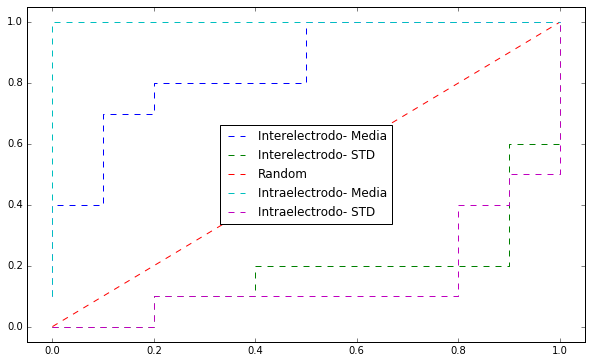

In [15]:
def Max_AUC(labels, scores):
    auc1 = roc_auc_score([t == 'S' for t in labels], scores)
    auc2 = roc_auc_score([t == 'P' for t in labels], scores)
    return max(auc1, auc2)

#Inter y intraelectrodo
print "Interelectrodo e intraelectrodo"
roc_curva = roc_curve(interelectrodo['Tipo'], interelectrodo['mean_mutual_81_167'], pos_label='S')
plt.plot(roc_curva[0], roc_curva[1], '--', label='Interelectrodo- Media')
roc_curva = roc_curve(interelectrodo['Tipo'], interelectrodo['std_mutual81_167'], pos_label='S')
plt.plot(roc_curva[0], roc_curva[1], '--', label='Interelectrodo- STD')
plt.plot([0,1], [0,1],'--', label="Random")

x,y,z = roc_curve(interelectrodo['Tipo'], tablaCantBines['mean_entropy'], pos_label='S')
plt.plot(x,y, '--', label="Intraelectrodo- Media")
x,y,z = roc_curve(interelectrodo['Tipo'], tablaCantBines['std_entropy'], pos_label='S')
plt.plot(x,y, '--', label="Intraelectrodo- STD")

plt.legend(loc='best')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

plt.show()


aucs = pd.Series([])
aucs['mean_mutual_81_167'] = Max_AUC(interelectrodo['Tipo'], interelectrodo['mean_mutual_81_167'])
aucs['std_mutual81_167'] = Max_AUC(interelectrodo['Tipo'], interelectrodo['std_mutual81_167'])
aucs['mean_entropy'] = Max_AUC(interelectrodo['Tipo'], tablaCantBines['mean_entropy'])
aucs['std_entropy'] = Max_AUC(interelectrodo['Tipo'], tablaCantBines['std_entropy'])

Bandas NO NORMALIZADAS


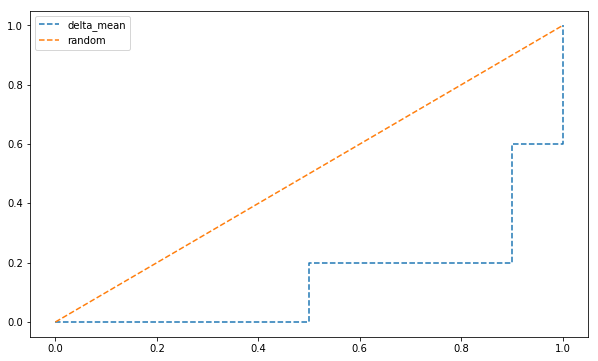

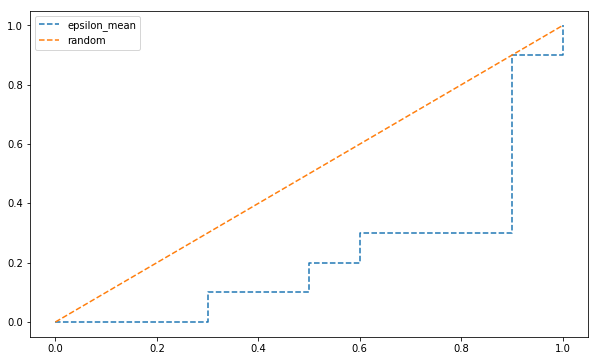

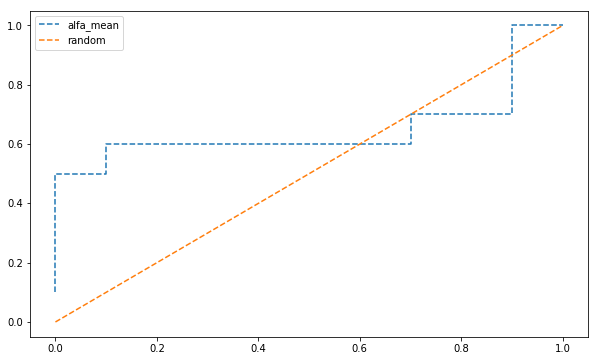

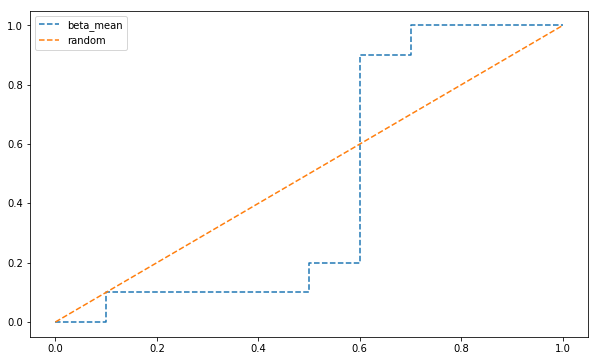

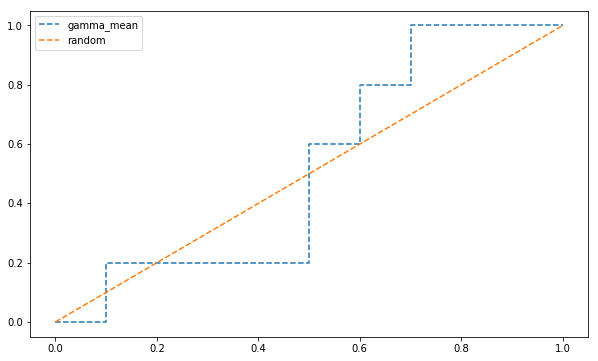

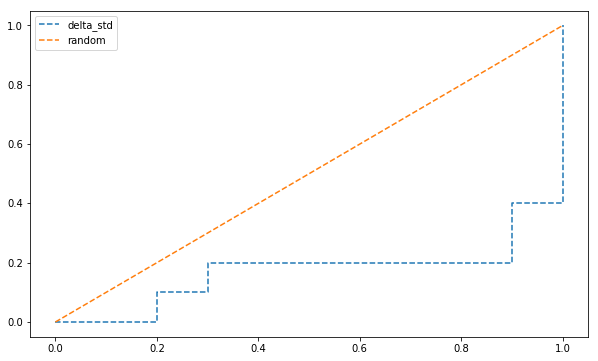

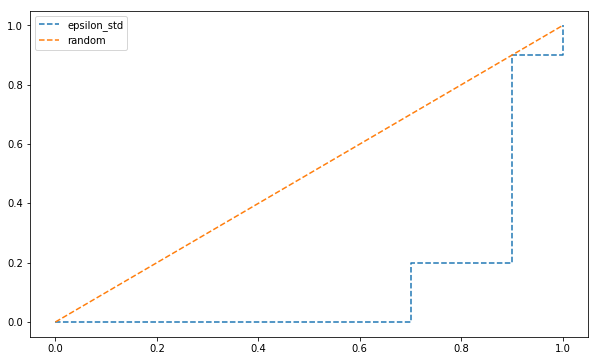

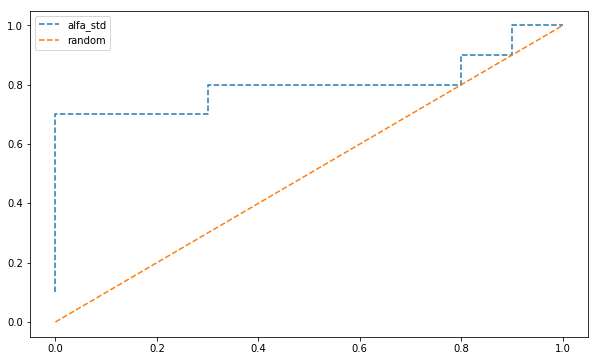

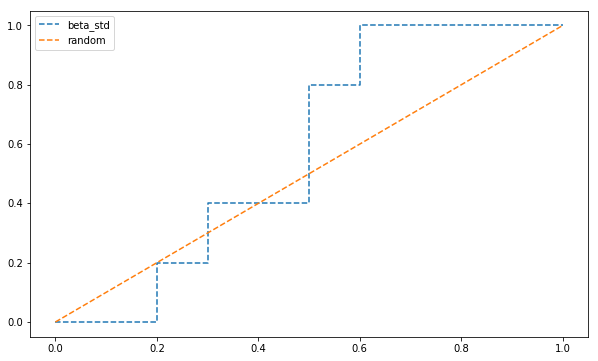

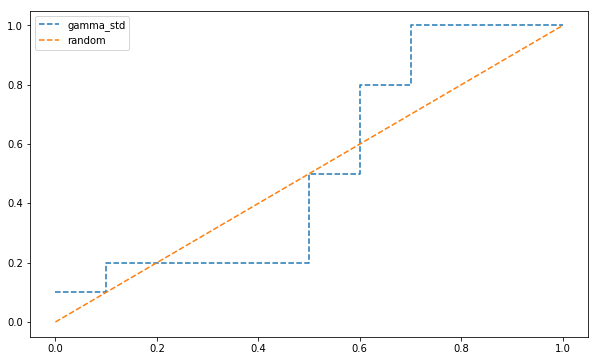

In [132]:
#bandas no normalizadas
print "Bandas NO NORMALIZADAS"
for banda in bandas_no_normalizadas.columns[:-1]:
    x,y,z = roc_curve(bandas_no_normalizadas['Tipo'], bandas_no_normalizadas[banda], pos_label='S')
    aucs[banda] = Max_AUC(bandas_no_normalizadas['Tipo'], bandas_no_normalizadas[banda])
    plt.plot(x,y, '--', label=banda)
    plt.plot([0,1], [0,1], '--', label='random')
    plt.legend(loc='best')
    plt.show()

Bandas NORMALIZADAS


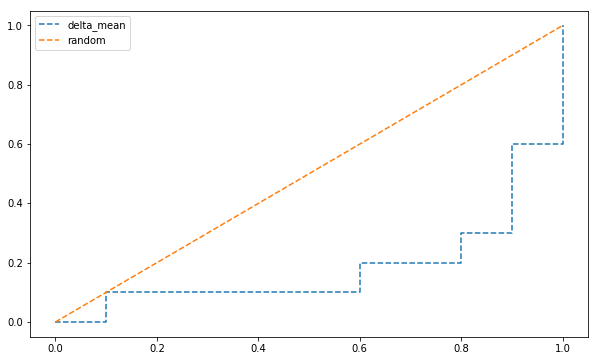

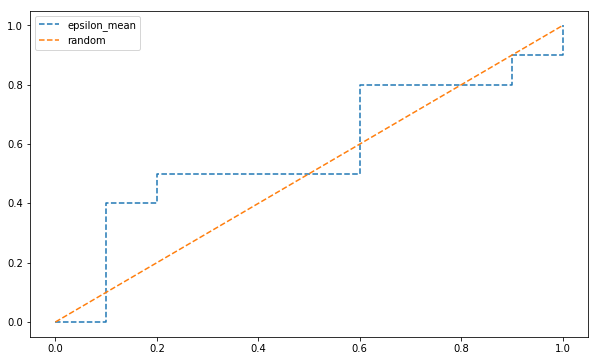

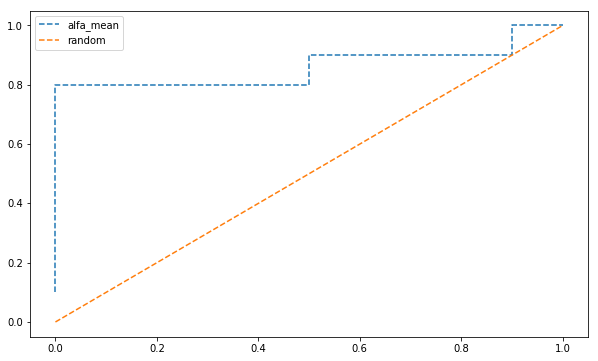

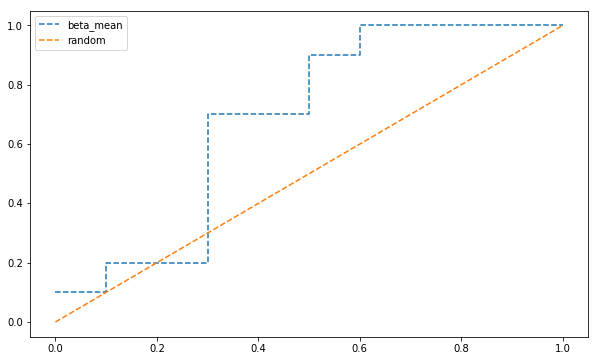

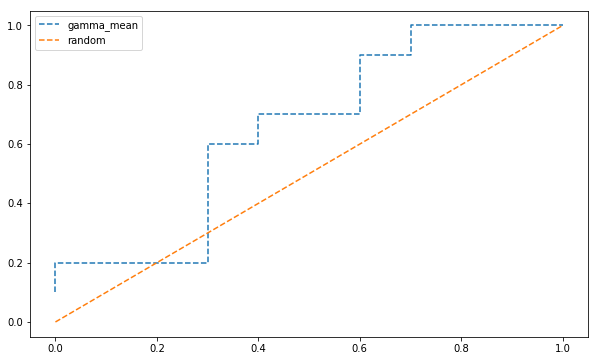

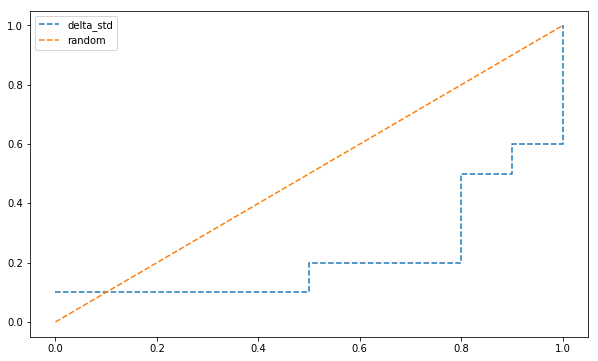

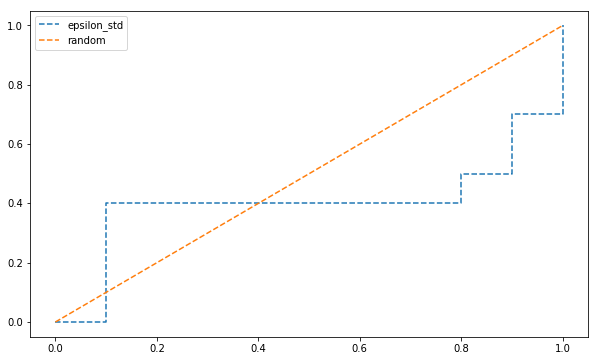

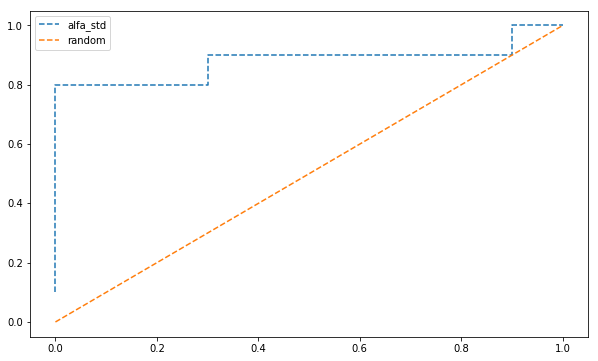

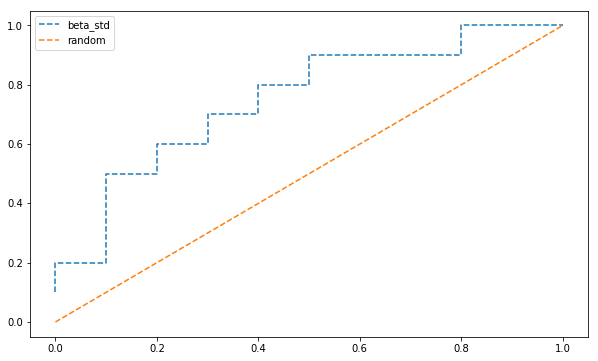

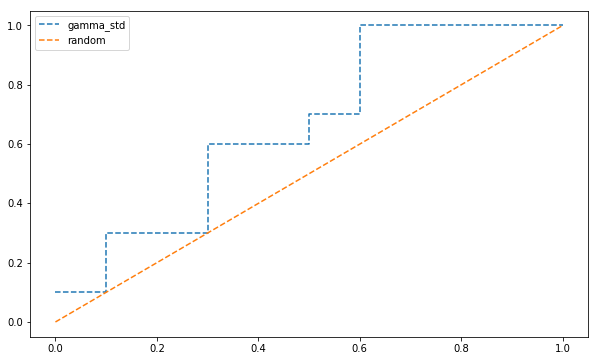

In [138]:
#bandas normalizadas
print "Bandas NORMALIZADAS"
for banda in bandas_normalizadas.columns[:-1]:
    x,y,z = roc_curve(bandas_normalizadas['Tipo'], bandas_normalizadas[banda], pos_label='S')
    aucs[banda+'_Norm'] = Max_AUC(bandas_normalizadas['Tipo'], bandas_normalizadas[banda])
    plt.plot(x,y, '--', label=banda)
    plt.plot([0,1], [0,1], '--', label='random')
    plt.legend(loc='best')
    plt.show()

In [139]:
aucs

mean_mutual_81_167    0.85
std_mutual81_167      0.82
mean_entropy          1.00
std_entropy           0.85
delta_mean            0.86
epsilon_mean          0.78
alfa_mean             0.65
beta_mean             0.55
gamma_mean            0.52
delta_std             0.83
epsilon_std           0.87
alfa_std              0.80
beta_std              0.58
gamma_std             0.52
delta_mean_Norm       0.82
epsilon_mean_Norm     0.57
alfa_mean_Norm        0.86
beta_mean_Norm        0.68
gamma_mean_Norm       0.65
delta_std_Norm        0.78
epsilon_std_Norm      0.60
alfa_std_Norm         0.88
beta_std_Norm         0.75
gamma_std_Norm        0.66
dtype: float64

### b) Utilizando una técnica de cross validación, estimar la performance de un classificador Logistic Regression para cada feature y graficar la curva ROC correspondiente. ¿Cuál es su conclución respecto a los resultados obtenidos en el punto anterior?


Cross validation scores alfa_mean:  [ 0.25  1.    0.5   0.75  0.25] 

Cross validation scores beta_mean:  [ 0.5   0.25  0.25  0.5   0.5 ]


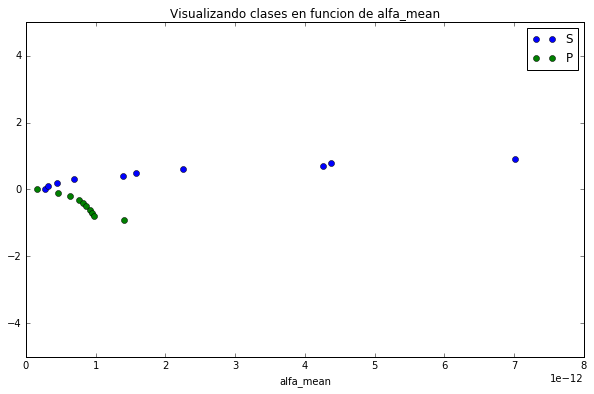

In [157]:
lr = LogisticRegression(penalty='l1')

datas_alfa = [[data*1e14] for data in bandas_no_normalizadas['alfa_mean']]
datas_beta = [[data*1e14] for data in bandas_no_normalizadas['beta_mean']]

flat_data = [item for sublist in datas for item in sublist]


scores = cross_validate(lr, X=datas_alfa, y=interelectrodo['Tipo'], cv=5, return_train_score=False)
print "Cross validation scores alfa_mean: ", scores["test_score"], '\n'

scores = cross_validate(lr, X=datas_beta, y=interelectrodo['Tipo'], cv=5, return_train_score=False)
print "Cross validation scores beta_mean: ", scores["test_score"] 

# lr.fit(datas, interelectrodo['Tipo'])    
# for caso in flat_data:
#     print 
#     print lr.predict_proba(caso)
#     print lr.predict(caso)
  
plt.plot(sorted(bandas_no_normalizadas[bandas_no_normalizadas.Tipo=='S'].alfa_mean), 
         [x/10.0 for x in range (0, 10)], 
         'o', label='S')

plt.plot(sorted(bandas_no_normalizadas[bandas_no_normalizadas.Tipo=='P'].alfa_mean), 
         [-x/10.0 for x in range (0, 10)], 
         'o', label='P')

plt.legend(loc='best')
plt.title("Visualizando clases en funcion de alfa_mean")
plt.xlabel("alfa_mean")
plt.ylim(-5, 5)
plt.show()

In [155]:
y = interelectrodo['Tipo']
  
print "Cross validation para bandas normalizadas: \n"
for banda in bandas_normalizadas.columns[:-1]:
    lr = LogisticRegression(penalty='l1')
    datas = [[data*1e2] for data in bandas_normalizadas[banda]]
    scores = cross_validate(lr, X=datas, y=y, cv=5, return_train_score=False)
    print "Cross validation scores {}: ".format(banda), scores["test_score"], '\n'
    
print "\n\nCross validation para bandas no normalizadas: \n"
for banda in bandas_no_normalizadas.columns[:-1]:
    lr = LogisticRegression(penalty='l1')
    escalar = -log(bandas_no_normalizadas[banda].min())
    datas = [[data*(10**(escalar*0.1))] for data in bandas_normalizadas[banda]]
    scores = cross_validate(lr, X=datas, y=y, cv=5, return_train_score=False)
    print "Cross validation scores {}: ".format(banda), scores["test_score"], '\n'

Cross validation para bandas normalizadas: 

Cross validation scores delta_mean:  [ 0.75  0.5   0.5   0.5   0.25] 

Cross validation scores epsilon_mean:  [ 0.5   0.5   0.5   0.5   0.25] 

Cross validation scores alfa_mean:  [ 0.75  1.    1.    1.    0.75] 

Cross validation scores beta_mean:  [ 0.5  0.5  0.5  0.5  0.5] 

Cross validation scores gamma_mean:  [ 0.5  0.5  0.5  0.5  0.5] 

Cross validation scores delta_std:  [ 0.75  0.5   0.75  0.5   0.5 ] 

Cross validation scores epsilon_std:  [ 0.5  0.5  0.5  0.5  0.5] 

Cross validation scores alfa_std:  [ 0.75  1.    1.    1.    0.75] 

Cross validation scores beta_std:  [ 0.5  1.   0.5  1.   0.5] 

Cross validation scores gamma_std:  [ 0.25  0.5   0.5   0.5   0.5 ] 



Cross validation para bandas no normalizadas: 

Cross validation scores delta_mean:  [ 0.75  0.5   0.5   0.5   0.25] 

Cross validation scores epsilon_mean:  [ 0.5   0.5   0.5   0.5   0.25] 

Cross validation scores alfa_mean:  [ 0.75  1.    0.75  1.    0.75] 

Cross 